# 1. Your views about the problem statement?

Predicting rainfall using machine learning with various classification models is a well-established approach as the problem statement include predicting the rainfall in sydeny. we have given the data of past rainfall in sydeny from 2008 to 2017 on this basis we have to create a machine learning model to predict the rainfall in future. overall the problem statement offers a valuable avenue to learn and apply machine learning techniques in a practical and impactful way.

# 2. What will be your approach to solving this task?

1. **Data Acquisition:** Import the historical weather data which is given by internshala  as it will be used for further processing.

2. **Data Preprocessing:** Cleaning the data by handling missing values and outliers.Replace Null values with its mean value.This may involve techniques such as imputation, outlier detection, and normalization. 

3. **Splitting Data:** Divide the dataset into training and testing sets to evaluate the model's performance.

4. **Model Selection:** Choose appropriate machine learning models based on the nature and complexity of the data . As this is a classification task, models like decision tree, random forest, bagging ,Ada boosting , xgboost could be considered.

5. **Model Training:** I will Train the selected models using the training data. Utilize various techniques to optimize model performance.

6. **Model Evaluation:** Evaluate the trained models using appropriate evaluation metrics on the testing dataset. Compare the performance of different models to select the best one.

# 3. What were the available ML model options you had to perform this task?

To perdorm this task there are several machine learning models as in the problem statement it is stated that you can use decision tree or various ensemble methods. Here are some of the available ML model options:

1. **Decision Trees:** These models create tree-like structures where splits are made on features based on specific thresholds.

2. **Random Forests:** This ensemble method combines multiple decision trees, making it robust to overfitting and handling complex relationships well.

3. **XGBoost:** XGBoost, which stands for Extreme Gradient Boosting, is a powerful open-source software library  used for machine learning tasks, particularly those involving classification problems.

4. **AdaBoost:** short for Adaptive Boosting, is powerful algorithm in the machine learning world, well-suited for classification tasks like rainfall prediction.

5. **Bagging:** Bagging works by training multiple models, typically from the same family (e.g., decision trees), on different subsets of your data with replacement. 

# Now we will be importing the libraries and the data.

In [252]:
#importing important libraries

In [253]:
import pandas as pd

In [254]:
import numpy as np

In [255]:
import seaborn as sns

In [256]:
df = pd.read_csv("C:/Users/Shubham Naik/Desktop/pgc_python_work/sydney_rain prediction.csv") #here we are importing the data

In [257]:
df.head() #overview of the data by using .head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2/1/2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1  2/2/2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2  2/3/2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3  2/4/2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4  2/5/2008   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

In [258]:
df = pd.get_dummies(df,columns=["RainToday"],drop_first=True)

In [259]:
df = pd.get_dummies(df,columns=["RainTomorrow"],drop_first=True)

In [260]:
df['RainToday_Yes'] = df['RainToday_Yes'].astype(int)
df['RainTomorrow_Yes'] = df['RainTomorrow_Yes'].astype(int)

In [261]:
df.head() #overview of the data by using .head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2/1/2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1  2/2/2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2  2/3/2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3  2/4/2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4  2/5/2008   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.7     20.9              1                 1  
1     22.4     24.8              1                 1  
2     23.5     23.0              1                 1  
3     21.4     20.9              1                 1  
4     22.5     25.5              1                 1

In [262]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3334.000000  3335.000000  3331.000000  3286.000000  3321.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.553641     4.494638     9.895172     2.777407     3.810886   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.300000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3323.000000  3324.000000  3317.000000  3318.000000  2771.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.085355    16.293530     7.021571     7.032211     2.749578   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.700000  1011.300000     1.000000   
50%      69.000000    56.000000  1018.600000  1016.300000     5.000000   
75%      80.000000    65.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm      Temp9am      Temp3pm  RainToday_Yes  RainTomorrow_Yes  
count  2776.000000  3333.000000  3333.000000    3337.000000       3337.000000  
mean      4.218660    17.819742    21.533333       0.259515          0.259215  
std       2.641885     4.897177     4.303737       0.438434          0.438269  
min       0.000000     6.400000    10.200000       0.000000          0.000000  
25%       1.000000    13.800000    18.400000       0.000000          0.000000  
50%       4.000000    18.200000    21.300000       0.000000          0.000000  
75%       7.000000    21.700000    24.500000       1.000000          1.000000  
max       8.000000    36.500000    44.700000       1.000000          1.000000

# Now we will be doing data preprocessing in which we have to clean the data by handling the missing values and outliers.

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3334 non-null   float64
 3   MaxTemp           3335 non-null   float64
 4   Rainfall          3331 non-null   float64
 5   Evaporation       3286 non-null   float64
 6   Sunshine          3321 non-null   float64
 7   Humidity9am       3323 non-null   float64
 8   Humidity3pm       3324 non-null   float64
 9   Pressure9am       3317 non-null   float64
 10  Pressure3pm       3318 non-null   float64
 11  Cloud9am          2771 non-null   float64
 12  Cloud3pm          2776 non-null   float64
 13  Temp9am           3333 non-null   float64
 14  Temp3pm           3333 non-null   float64
 15  RainToday_Yes     3337 non-null   int32  
 16  RainTomorrow_Yes  3337 non-null   int32  


* as we can see that there are many null values in our data so they can be replaced with mean value

In [264]:
df.Evaporation=df.Evaporation.fillna(df.Evaporation.mean()) #here we have treated a single coumn containing null values.

In [265]:
for column in df.columns:
    if df[column].isnull().any():  
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)
#as it will take to long to treat all columns containing null values so here we have treated all of the remaining columns that are having null values.

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3337 non-null   object 
 1   Location          3337 non-null   object 
 2   MinTemp           3337 non-null   float64
 3   MaxTemp           3337 non-null   float64
 4   Rainfall          3337 non-null   float64
 5   Evaporation       3337 non-null   float64
 6   Sunshine          3337 non-null   float64
 7   Humidity9am       3337 non-null   float64
 8   Humidity3pm       3337 non-null   float64
 9   Pressure9am       3337 non-null   float64
 10  Pressure3pm       3337 non-null   float64
 11  Cloud9am          3337 non-null   float64
 12  Cloud3pm          3337 non-null   float64
 13  Temp9am           3337 non-null   float64
 14  Temp3pm           3337 non-null   float64
 15  RainToday_Yes     3337 non-null   int32  
 16  RainTomorrow_Yes  3337 non-null   int32  


In [267]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2/1/2008   Sydney     19.5     22.4      15.6     6.200000       0.0   
1  2/2/2008   Sydney     19.5     25.6       6.0     3.400000       2.7   
2  2/3/2008   Sydney     21.6     24.5       6.6     2.400000       0.1   
3  2/4/2008   Sydney     20.2     22.8      18.8     2.200000       0.0   
4  2/5/2008   Sydney     19.7     25.7      77.4     5.187432       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.7     20.9              1                 1  
1     22.4     24.8              1                 1  
2     23.5     23.0              1                 1  
3     21.4     20.9              1                 1  
4     22.5     25.5              1                 1

#### now as we have treated the null values we will now look at the *outliers*

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


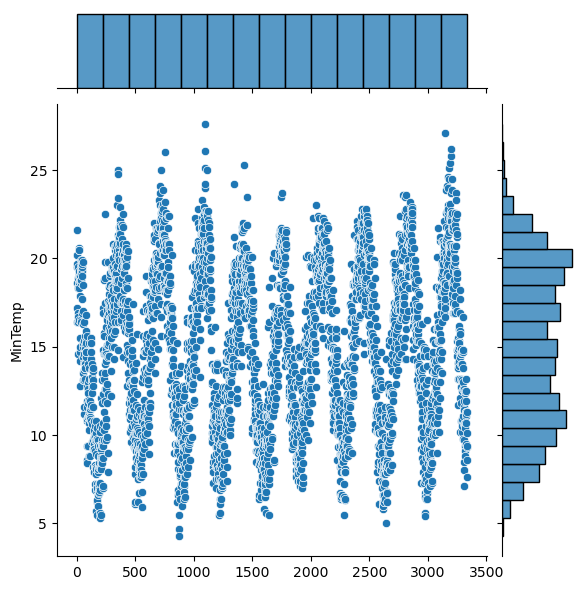

In [268]:
sns.jointplot(df['MinTemp']) # creating a jointpolt on MinTemp column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


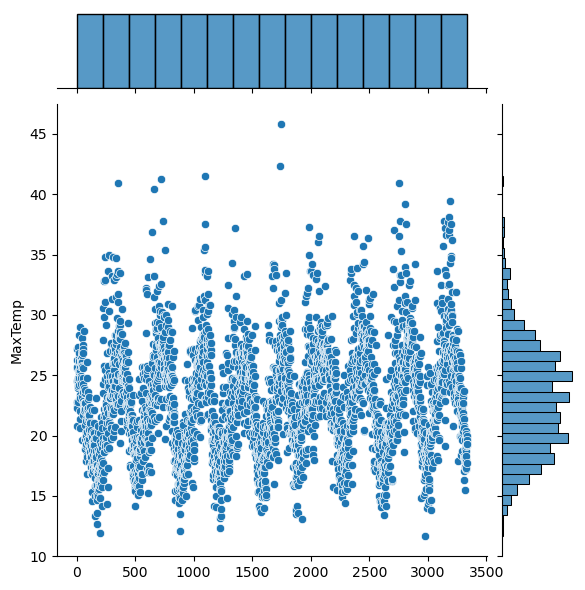

In [269]:
sns.jointplot(df['MaxTemp']) # creating a jointpolt on MaxTemp column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


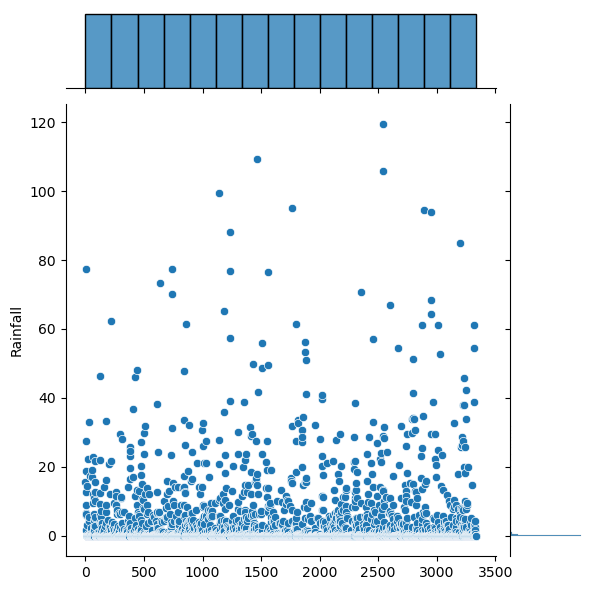

In [270]:
sns.jointplot(df['Rainfall']) # creating a jointpolt on Rainfall column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


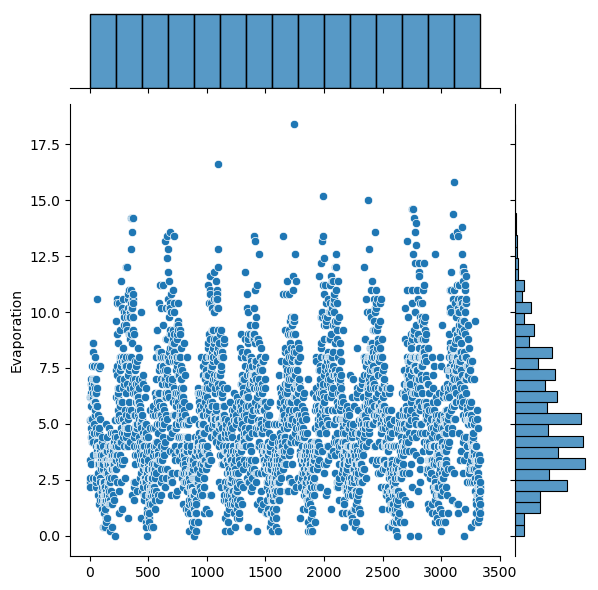

In [271]:
sns.jointplot(df['Evaporation']) # creating a jointpolt on Evaporation column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


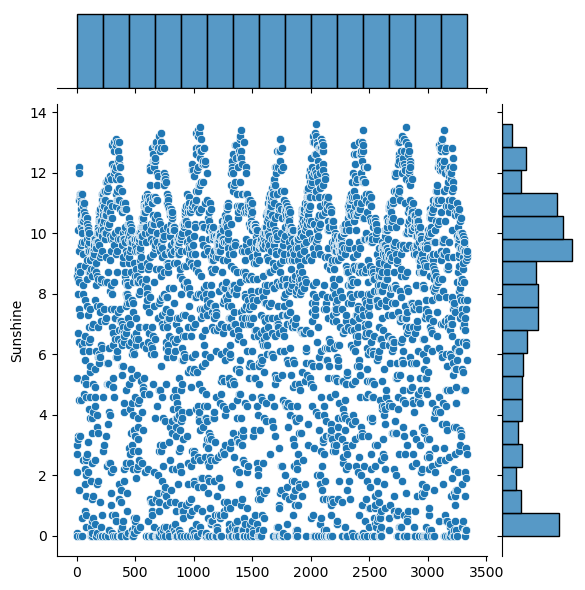

In [272]:
sns.jointplot(df['Sunshine']) # creating a jointpolt on Sunshine column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


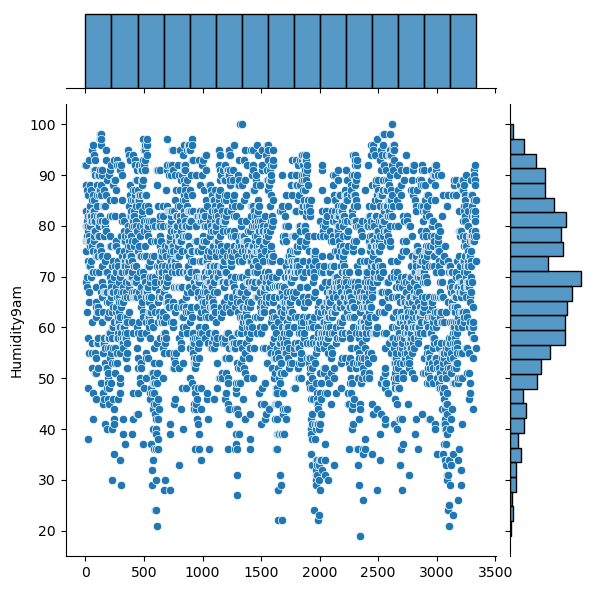

In [273]:
sns.jointplot(df['Humidity9am']) # creating a jointpolt on Humidity9am column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


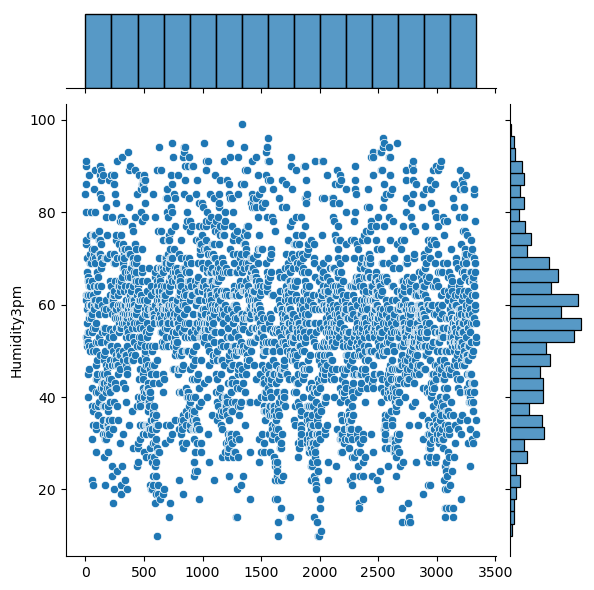

In [274]:
sns.jointplot(df['Humidity3pm']) # creating a jointpolt on Humidity3pm column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


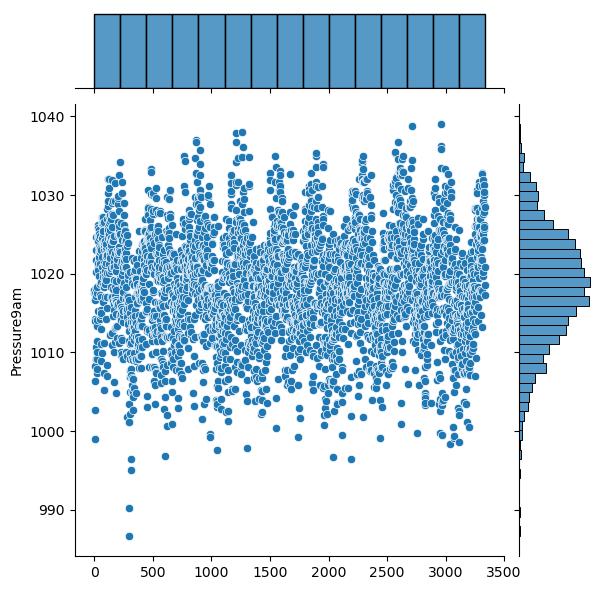

In [275]:
sns.jointplot(df['Pressure9am']) # creating a jointpolt on Pressure9am column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


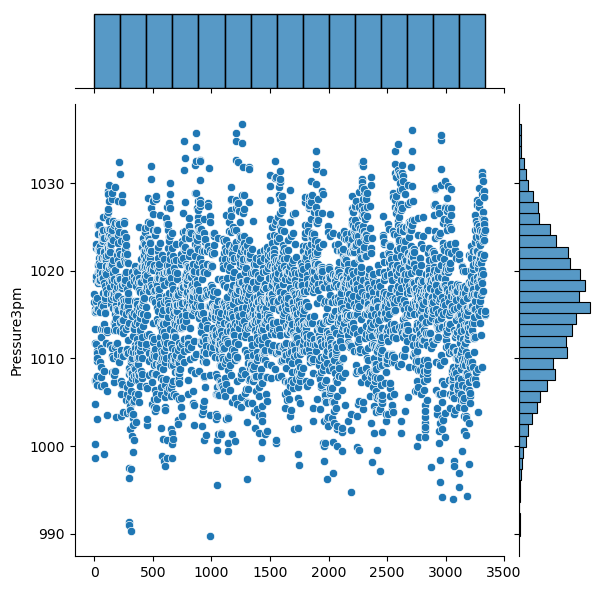

In [276]:
sns.jointplot(df['Pressure3pm']) # creating a jointpolt on Pressure3pm column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


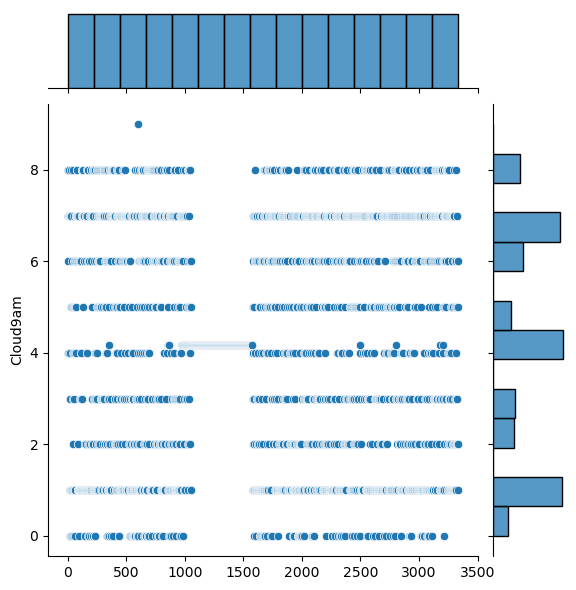

In [277]:
sns.jointplot(df['Cloud9am']) # creating a jointpolt on Cloud9am column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


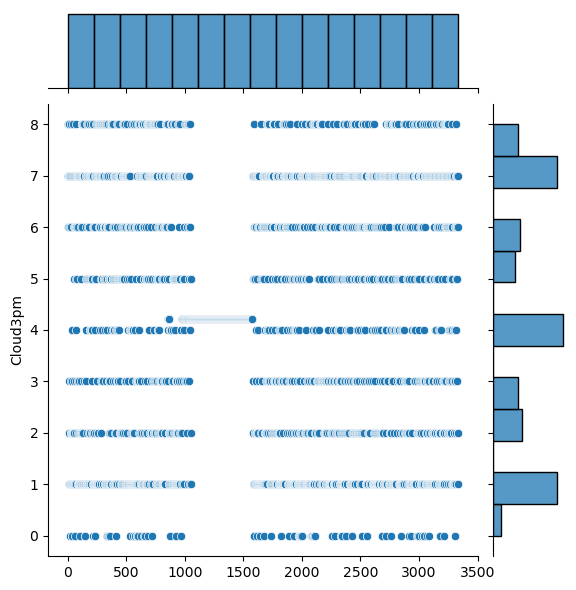

In [278]:
sns.jointplot(df['Cloud3pm']) # creating a jointpolt on Cloud3pm column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


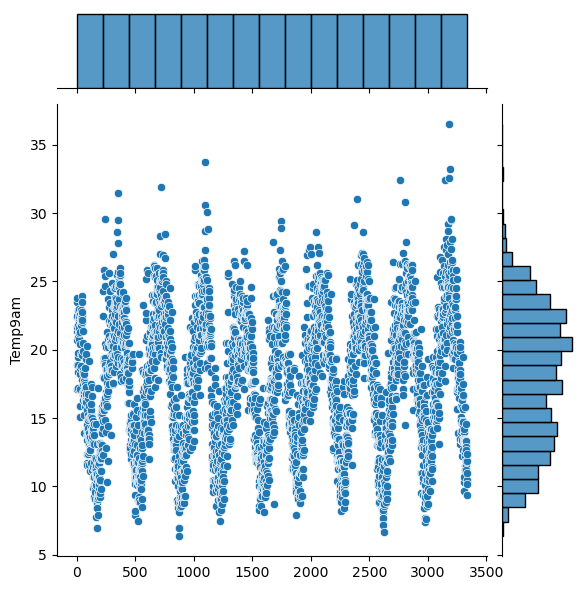

In [279]:
sns.jointplot(df['Temp9am']) # creating a jointpolt on Temp9am column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


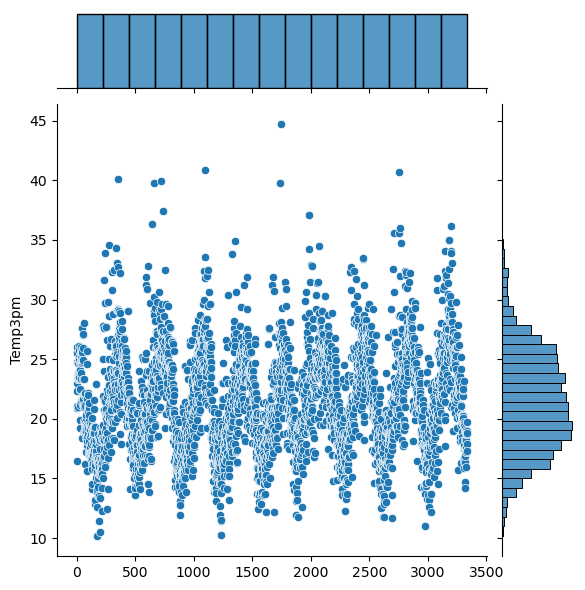

In [280]:
sns.jointplot(df['Temp3pm']) # creating a jointpolt on Temp3pm column.

* As we have plotted the graph we can see the outlier in one of the grhap so now we need to remove them.

#### Cloud9am outlier removal.

In [281]:
np.percentile(df.Cloud9am,[99])

array([8.])

In [282]:
np.percentile(df.Cloud9am,[99])[0]   #to fetch 1st number of an array

8.0

In [283]:
upper_value = np.percentile(df.Cloud9am,[99])[0]  #to store the 1st number of an array in new variable.

In [284]:
df[(df.Cloud9am>upper_value)]

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
600  9/23/2009   Sydney     17.0     21.8       4.4         11.2       8.0   

     Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
600         40.0         36.0        996.8        997.8       9.0       3.0   

     Temp9am  Temp3pm  RainToday_Yes  RainTomorrow_Yes  
600     17.3     20.9              1                 0

In [285]:
df.Cloud9am[(df.Cloud9am> upper_value)]= upper_value

C:\Users\Shubham Naik\AppData\Local\Temp\ipykernel_1896\2105684374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Cloud9am[(df.Cloud9am> upper_value)]= upper_value


In [286]:
df[(df.Cloud9am>upper_value)]

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday_Yes, RainTomorrow_Yes]
Index: []

* now the outlier has been removed of Cloud9am column.

In [287]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2/1/2008   Sydney     19.5     22.4      15.6     6.200000       0.0   
1  2/2/2008   Sydney     19.5     25.6       6.0     3.400000       2.7   
2  2/3/2008   Sydney     21.6     24.5       6.6     2.400000       0.1   
3  2/4/2008   Sydney     20.2     22.8      18.8     2.200000       0.0   
4  2/5/2008   Sydney     19.7     25.7      77.4     5.187432       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.7     20.9              1                 1  
1     22.4     24.8              1                 1  
2     23.5     23.0              1                 1  
3     21.4     20.9              1                 1  
4     22.5     25.5              1                 1

# Test-Train split so here the test will be 20% of the data and train will be 80% of the data.

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X = df.drop(['RainTomorrow_Yes','Date', 'Location'], axis=1) # here the RainTomorrow_Yes,Date,Location is dropped and for every other column X variable is assigned .
# X contains all the independent collumns. here axis is 1 as we are droping the column.

In [290]:
y = df['RainTomorrow_Yes'] #the y contains the RainTomorrow_Yes as it is to be predicted.

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Decision tree classifier 

In [292]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [293]:
from sklearn.metrics import  confusion_matrix,mean_squared_error,r2_score,roc_auc_score,mean_absolute_error

In [294]:
regtree = tree.DecisionTreeClassifier(max_depth=3)

In [295]:
regtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [296]:
y_train_pred=regtree.predict(X_train)

In [297]:
y_test_pred=regtree.predict(X_test)

In [298]:
mean_squared_error(y_test,y_test_pred)

0.18862275449101795

In [299]:
r2_score(y_train,y_train_pred)

0.10721242504329076

In [300]:
r2_score(y_test,y_test_pred)

-0.04452717795979155

In [301]:
roc_auc_score(y_test,y_test_pred)

0.7170265574584264

In [302]:
mean_absolute_error(y_test,y_test_pred)

0.18862275449101795

In [303]:
dot_data= tree.export_graphviz(regtree,out_file=None)

In [304]:
from IPython.display import Image

In [305]:
import pydotplus

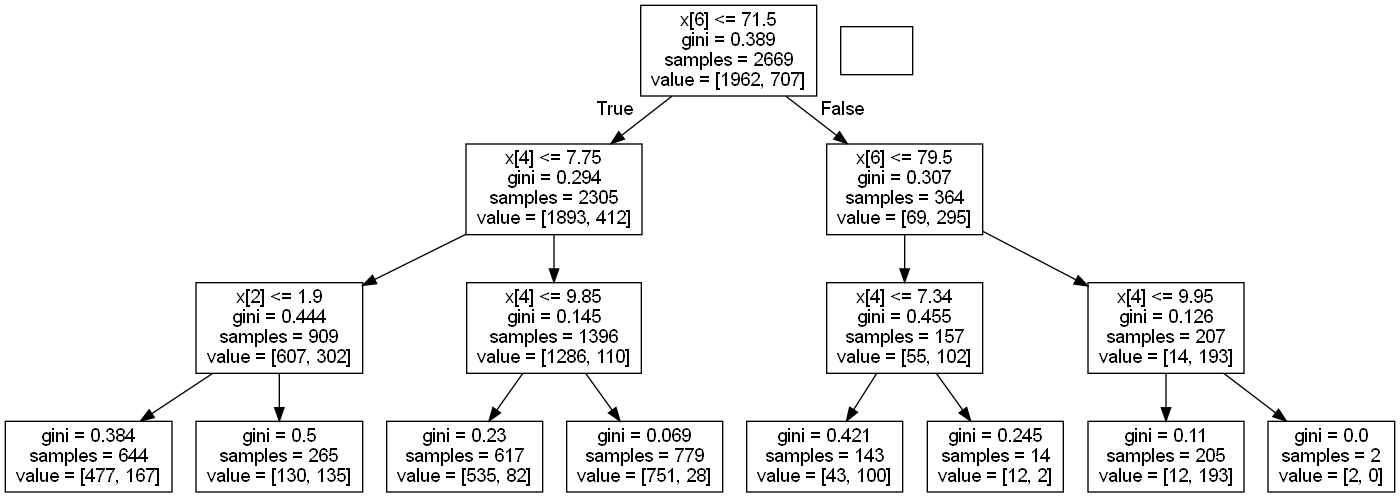

In [306]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# random forest

In [307]:
from sklearn.ensemble import RandomForestRegressor

In [308]:
df_rf = RandomForestRegressor(n_estimators=1000,max_depth=5,random_state=0)


In [309]:
df_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=0)

In [310]:
df_rf.predict(X_test)

array([0.03405483, 0.31024167, 0.03465364, 0.09239436, 0.06717051,
       0.05393375, 0.03098959, 0.25024687, 0.16931634, 0.25706561,
       0.34030937, 0.23753107, 0.05164851, 0.22156335, 0.05230003,
       0.04460499, 0.42272229, 0.07935196, 0.03034339, 0.05779008,
       0.03271301, 0.21346336, 0.09728784, 0.04462489, 0.06813717,
       0.43653133, 0.07420201, 0.02950588, 0.18279327, 0.10213167,
       0.03510472, 0.68459294, 0.03642165, 0.06320501, 0.09262663,
       0.44173129, 0.69645449, 0.65542342, 0.7490938 , 0.21455687,
       0.07132078, 0.03573037, 0.03009322, 0.03683916, 0.05683814,
       0.03341551, 0.03359819, 0.6301933 , 0.34084939, 0.18146154,
       0.19230706, 0.15248299, 0.64751009, 0.0617902 , 0.06269217,
       0.19229517, 0.23737291, 0.4116041 , 0.75593292, 0.0542425 ,
       0.9497351 , 0.03033499, 0.04175031, 0.03051772, 0.04015414,
       0.41869516, 0.02991394, 0.23208529, 0.24272297, 0.04966409,
       0.03490928, 0.35271269, 0.04978163, 0.08877289, 0.25874

In [311]:
y_test_pred=df_rf.predict(X_test)

In [312]:
y_train_pred=df_rf.predict(X_train)

In [313]:
r2_score(y_test,y_test_pred)

0.3530776610209252

In [314]:
r2_score(y_train, y_train_pred)

0.4716629258922854

In [315]:
mean_squared_error(y_test,y_test_pred)

0.11682249738905537

In [316]:
roc_auc_score(y_test,y_test_pred)

0.8489327376520228

In [317]:
mean_absolute_error(y_test,y_test_pred)

0.23795969233919192

# XG Boost

In [318]:
import xgboost as xgb

In [319]:
xgb = xgb.XGBClassifier()

In [320]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [321]:
y_test_pred=df_rf.predict(X_test)

In [322]:
y_train_pred=df_rf.predict(X_train)

In [323]:
r2_score(y_train, y_train_pred)

0.4716629258922854

In [324]:
r2_score(y_test,y_test_pred)

0.3530776610209252

In [325]:
mean_squared_error(y_test,y_test_pred)

0.11682249738905537

In [326]:
roc_auc_score(y_test,y_test_pred)

0.8489327376520228

In [327]:
mean_absolute_error(y_test,y_test_pred)

0.23795969233919192

# AdaBoost

In [328]:
from sklearn.ensemble import AdaBoostClassifier


In [329]:
df_ada = AdaBoostClassifier()

In [330]:
df_ada.fit(X_train,y_train)

AdaBoostClassifier()

In [331]:
y_test_pred=df_rf.predict(X_test)

In [332]:
y_train_pred=df_rf.predict(X_train)

In [333]:
r2_score(y_test,y_test_pred)

0.3530776610209252

In [334]:
r2_score(y_train, y_train_pred)

0.4716629258922854

In [335]:
roc_auc_score(y_test,y_test_pred)

0.8489327376520228

In [336]:
mean_squared_error(y_test,y_test_pred)

0.11682249738905537

In [337]:
mean_absolute_error(y_test,y_test_pred)

0.23795969233919192

# Bagging

In [338]:
from sklearn.ensemble import BaggingClassifier

In [339]:
base_estimator = DecisionTreeClassifier()

In [340]:
bagging_clf = BaggingClassifier(base_estimator=base_estimator,n_jobs=-1,bootstrap=True, random_state=42)

In [341]:
bagging_clf.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_jobs=-1,
                  random_state=42)

In [342]:
y_test_pred=bagging_clf.predict(X_test)

In [343]:
y_train_pred=bagging_clf.predict(X_train)

In [344]:
r2_score(y_test,y_test_pred)

0.021792007942417313

In [345]:
r2_score(y_train, y_train_pred)

0.9172632204242704

In [346]:
roc_auc_score(y_test,y_test_pred)

0.7073963762720278

In [347]:
mean_squared_error(y_test,y_test_pred)

0.17664670658682635

In [348]:
mean_absolute_error(y_test,y_test_pred)

0.17664670658682635

**Decision tree classifier**
    * r2_score(tarin):0.10721242504329076
    
    * r2_score(test):0.021792007942417313
    
    * mean_squared_error(test):0.18862275449101795
    
    * roc_auc_score(test):0.7073963762720278
    
    * mean_absolute_error(test):0.17664670658682635

**Random forest**
   * r2_score(tarin):0.9172632204242704

   * r2_score(test):0.3530776610209252
     
   * mean_squared_error(test)0.11682249738905537
     
   * roc_auc_score(test):0.7073963762720278
     
   * mean_absolute_error(test):0.23795969233919192
     

**XG Boost**
   *  r2_score(tarin):0.9172632204242704
     
   * r2_score(test):0.021792007942417313
     
   * mean_squared_error(test)0.17664670658682635
     
   * roc_auc_score(test):0.7073963762720278
     
   * mean_absolute_error(test):0.23795969233919192

**AdaBoost**
  *  r2_score(tarin):0.9172632204242704
    
  *  r2_score(test):0.021792007942417313
    
  *  mean_squared_error(test)0.17664670658682635
    
  *  roc_auc_score(test):0.7073963762720278
    
  *  mean_absolute_error(test):0.23795969233919192
    

**Bagging**
   * r2_score(tarin):0.9172632204242704
     
   * r2_score(test):0.021792007942417313
     
   * mean_squared_error(test)0.17664670658682635
     
   * roc_auc_score(test):0.7073963762720278
     
   * mean_absolute_error(test):0.17664670658682635

# 4.Which model’s performance is best and what could be the possible reason for that?

The r2 score(test) is best.
* 1.Model Complexity and Flexibility.
* 2.Regularization.
* 3.Computational Resources.
* 4.Data Quality and Quantity.

# 5. What steps can you take to improve this selected model’s performance even further?

Here are several steps you can take to improve the performance of your chosen model for rainfall prediction:

* Feature Engineering: Analyze your data to create new features that might be more predictive of rainfall. Combine existing features (e.g., a "heat index" from temperature and humidity).

* Feature Selection: Not all features contribute equally. Use techniques like feature importance scores from your model or statistical tests to identify the most significant features and remove redundant ones.

* Data Augmentation (if applicable): If your dataset is limited, consider creating synthetic data points that resemble real data to increase the training data size. This can be helpful for some models, especially deep learning models.

* Data Balancing: If your data has imbalanced classes (e.g., more rainless days than rainy days), techniques like oversampling (replicating minority class examples) or undersampling (removing majority class examples) can be used to address this imbalance.